# Projeto: Análise de Vendas de uma Loja

**Objetivos:**

* Analisar os dados de vendas de uma loja e extrair informações importantes, como:

1. Produtos mais vendidos
2. A distribuição das vendas por categoria
3. Calcular a média de vendas por mês

#

### 1. Coleta de Dados

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [185]:
vendas = pd.read_csv('vendas.csv')
vendas

,ID_Venda,ID_Cliente,Produto,Categoria,Quantidade,Preço,Data
0,1,982,Monitor,Imagem,4.0,177.44,2024-04-02
1,2,972,Tablet,Acessórios,5.0,984.28,2024-06-11
2,3,530,Mouse,Portáteis,1.0,2177.53,2024-03-08
3,4,854,Teclado,Acessórios,5.0,1514.71,2024-09-29
4,5,932,Fone de Ouvido,Acessórios,3.0,311.76,2024-01-19
...,...,...,...,...,...,...,...
9995,9996,12,Smartphone,Periféricos,5.0,4340.03,2023-11-30
9996,9997,551,Câmera,Acessórios,3.0,4606.46,2024-05-10
9997,9998,985,Câmera,Imagem,2.0,3301.40,2024-04-02
9998,9999,698,Tablet,Portáteis,3.0,1535.11,2024-07-27


In [186]:
clientes = pd.read_csv('clientes.csv')
clientes

,ID_Cliente,Nome,Idade,Gênero,Cidade
0,1,Giovanna Peixoto,44,Feminino,Curitiba
1,2,Ana Vitória Mendes,48,Masculino,Rio de Janeiro
2,3,Breno Silveira,35,Feminino,São Paulo
3,4,Caio Pereira,38,Outro,São Paulo
4,5,Francisco Dias,60,Feminino,Rio de Janeiro
...,...,...,...,...,...
995,996,Vicente Gomes,22,Feminino,Salvador
996,997,Marcos Vinicius Gomes,53,Feminino,Salvador
997,998,Guilherme Almeida,70,Feminino,Porto Alegre
998,999,Miguel Cardoso,30,Masculino,Rio de Janeiro


### 2. Pré-processamento e Limpeza

2.1. Verificação de valores ausentes

In [187]:
print(vendas.isnull().sum())

ID_Venda        0
ID_Cliente      0
Produto       197
Categoria       0
Quantidade    199
Preço           0
Data            0
dtype: int64


In [188]:
print(clientes.isnull().sum())

ID_Cliente     0
Nome           0
Idade          0
Gênero         0
Cidade        55
dtype: int64


2.2. Tratamento de valores ausentes

* Para **vendas**, removemos registros sem "Produto" ou "Quantidade".
* Para **clientes**, preenchemos valores ausentes na coluna "Cidade" com "_Desconhecida_".

In [189]:
vendas = vendas.dropna(subset=['Produto', 'Quantidade'])
clientes['Cidade'] = clientes['Cidade'].fillna('Desconhecida')

2.3. Remoção de valores duplicados

In [190]:
vendas = vendas.drop_duplicates()
clientes = clientes.drop_duplicates()

### 3. Análise Exploratória dos Dados

**Resumo dos dados:**

In [191]:
vendas.describe()

,ID_Venda,ID_Cliente,Quantidade,Preço
count,9606.000000,9606.000000,9606.000000,9606.000000
mean,4998.891110,497.909952,3.002290,2544.066021
std,2885.063864,287.075038,1.420749,1426.375480
min,1.000000,1.000000,1.000000,50.500000
25%,2507.250000,247.000000,2.000000,1315.885000
50%,4995.500000,497.000000,3.000000,2561.015000
75%,7489.750000,746.000000,4.000000,3764.107500
max,10000.000000,1000.000000,5.000000,4999.960000


In [192]:
clientes.describe()

,ID_Cliente,Idade
count,1000.000000,1000.000000
mean,500.500000,44.529000
std,288.819436,15.382711
min,1.000000,18.000000
25%,250.750000,31.000000
50%,500.500000,45.000000
75%,750.250000,58.000000
max,1000.000000,70.000000


In [193]:
vendas.head()

,ID_Venda,ID_Cliente,Produto,Categoria,Quantidade,Preço,Data
0,1,982,Monitor,Imagem,4.0,177.44,2024-04-02
1,2,972,Tablet,Acessórios,5.0,984.28,2024-06-11
2,3,530,Mouse,Portáteis,1.0,2177.53,2024-03-08
3,4,854,Teclado,Acessórios,5.0,1514.71,2024-09-29
4,5,932,Fone de Ouvido,Acessórios,3.0,311.76,2024-01-19


In [194]:
clientes.head()

,ID_Cliente,Nome,Idade,Gênero,Cidade
0,1,Giovanna Peixoto,44,Feminino,Curitiba
1,2,Ana Vitória Mendes,48,Masculino,Rio de Janeiro
2,3,Breno Silveira,35,Feminino,São Paulo
3,4,Caio Pereira,38,Outro,São Paulo
4,5,Francisco Dias,60,Feminino,Rio de Janeiro


**Produtos mais vendidos:**

In [195]:
produtos_mais_vendidos = vendas.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

produtos_mais_vendidos.head(5)

Produto
Fone de Ouvido    3107.0
Notebook          2993.0
Smartwatch        2978.0
Impressora        2935.0
Tablet            2883.0
Name: Quantidade, dtype: float64

### 4. Junção de Dados

**Integração de Vendas e Clientes**

In [196]:
df_dados_completos = pd.merge(vendas, clientes, on='ID_Cliente')

df_dados_completos

,ID_Venda,ID_Cliente,Produto,Categoria,Quantidade,Preço,Data,Nome,Idade,Gênero,Cidade
0,1,982,Monitor,Imagem,4.0,177.44,2024-04-02,Calebe da Cunha,65,Outro,São Paulo
1,2,972,Tablet,Acessórios,5.0,984.28,2024-06-11,Vitor Cavalcanti,44,Feminino,Salvador
2,3,530,Mouse,Portáteis,1.0,2177.53,2024-03-08,Felipe Pires,48,Masculino,Porto Alegre
3,4,854,Teclado,Acessórios,5.0,1514.71,2024-09-29,Paulo Cardoso,60,Feminino,Rio de Janeiro
4,5,932,Fone de Ouvido,Acessórios,3.0,311.76,2024-01-19,Alana Farias,28,Feminino,Salvador
...,...,...,...,...,...,...,...,...,...,...,...
9601,9996,12,Smartphone,Periféricos,5.0,4340.03,2023-11-30,Elisa Lima,20,Feminino,Desconhecida
9602,9997,551,Câmera,Acessórios,3.0,4606.46,2024-05-10,Isabella Teixeira,43,Masculino,Porto Alegre
9603,9998,985,Câmera,Imagem,2.0,3301.40,2024-04-02,Samuel da Conceição,33,Masculino,Porto Alegre
9604,9999,698,Tablet,Portáteis,3.0,1535.11,2024-07-27,Dr. Noah Barbosa,60,Feminino,Desconhecida


**Criação de coluna Ano/Mês**

In [197]:
df_dados_completos['Data'] = pd.to_datetime(df_dados_completos['Data'])

df_dados_completos['Ano/Mês'] = df_dados_completos['Data'].dt.to_period('M')

df_dados_completos['Ano/Mês']

0       2024-04
1       2024-06
2       2024-03
3       2024-09
4       2024-01
         ...   
9601    2023-11
9602    2024-05
9603    2024-04
9604    2024-07
9605    2024-05
Name: Ano/Mês, Length: 9606, dtype: period[M]

### 5. Análise de Tendências

**Vendas por categoria**

In [198]:
vendas_por_categoria = df_dados_completos.groupby('Categoria')['Quantidade'].sum()

vendas_por_categoria

Categoria
Acessórios     7165.0
Imagem         7097.0
Periféricos    7348.0
Portáteis      7230.0
Name: Quantidade, dtype: float64

**Vendas por mês**

In [199]:
vendas_por_mes = df_dados_completos.groupby('Ano/Mês')['Quantidade'].sum()

vendas_por_mes

Ano/Mês
2023-11     815.0
2023-12    2571.0
2024-01    2355.0
2024-02    2415.0
2024-03    2375.0
2024-04    2254.0
2024-05    2571.0
2024-06    2431.0
2024-07    2370.0
2024-08    2477.0
2024-09    2395.0
2024-10    2404.0
2024-11    1407.0
Freq: M, Name: Quantidade, dtype: float64

### 6. Visualizações através de Gráficos

**Gráfico de produtos mais vendidos**

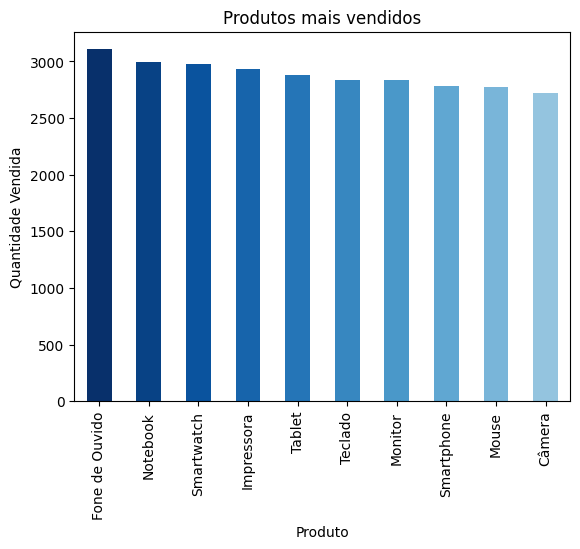

In [200]:
cores = plt.cm.Blues(np.linspace(1, 0.4, len(produtos_mais_vendidos)))
produtos_mais_vendidos.plot(kind='bar', title='Produtos mais vendidos', color=cores)
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.show()

**Gráfico de vendas por categoria**

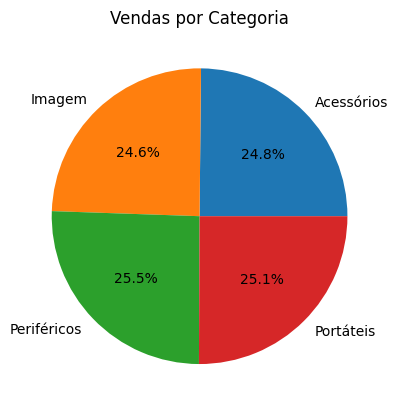

In [201]:
vendas_por_categoria.plot(kind='pie', autopct='%1.1f%%', title='Vendas por Categoria')
plt.ylabel('')
plt.show()

**Gráfico de tendência mensal**

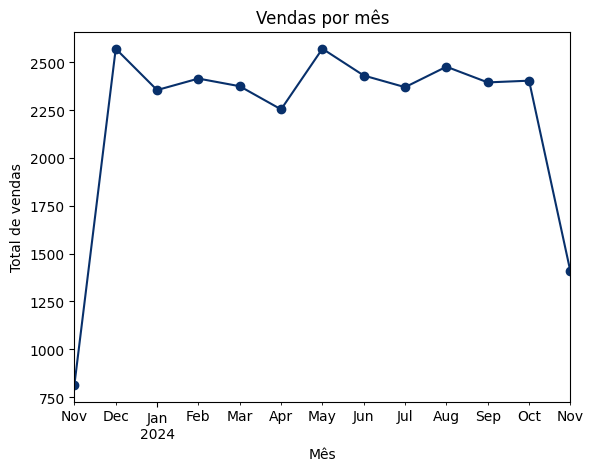

In [202]:
vendas_por_mes.plot(kind='line', marker='o', title='Vendas por mês', color=cores)
plt.xlabel('Mês')
plt.ylabel('Total de vendas')
plt.show()